In [1]:
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
with open('Drank_lastepisode_heat.pickle', 'rb') as f:
     last_heat = pickle.load(f)

In [3]:
with open('Drank_heat_unique0.pickle', 'rb') as f:
     heat_uniq0 = pickle.load(f)
with open('Drank_heat_freq0.pickle', 'rb') as f:
     heat_freq0 = pickle.load(f)
with open('Drank_heat_unique1.pickle', 'rb') as f:
     heat_uniq1 = pickle.load(f)
with open('Drank_heat_freq1.pickle', 'rb') as f:
     heat_freq1 = pickle.load(f)

In [ ]:
# with open('Drank_random_corr0.pickle', 'rb') as f:
#      rand_corr0 = pickle.load(f)
# with open('Drank_random_corr1.pickle', 'rb') as f:
#      rand_corr1 = pickle.load(f)
# with open('Drank_recent_corr0.pickle', 'rb') as f:
#      recen_corr0 = pickle.load(f)
# with open('Drank_recent_corr1.pickle', 'rb') as f:
#      recen_corr1 = pickle.load(f)

In [4]:
num_episodes = len(heat_freq0)
actions_space = np.arange(1.43, 2.0, 0.04)
num_actions = actions_space.size
num_sub = 500

In [5]:
np.unique(last_heat[:, 0, :, :], return_counts=True)

(array([9.], dtype=float32), array([112500]))

In [6]:
np.unique(last_heat[:, 0, :, :], return_counts=True)[1]/num_sub/num_actions**2

array([1.])

In [7]:
np.unique(last_heat[:, 1, :, :], return_counts=True)

(array([9.], dtype=float32), array([112500]))

In [8]:
np.unique(last_heat[:, 1, :, :], return_counts=True)[1]/num_sub/num_actions**2

array([1.])

In [9]:
np.sum(last_heat[:, 0, 0, 0] - last_heat[:, 1, 0, 0] < 0)/num_sub

0.0

In [10]:
np.sum(last_heat[:, 0, 0, 0] - last_heat[:, 1, 0, 0] == 0)/num_sub

1.0

In [11]:
np.sum(last_heat[:, 0, 0, 0] - last_heat[:, 1, 0, 0] > 0)/num_sub

0.0

In [12]:
full_freq0 = np.zeros((num_episodes, num_actions))
for i in range(num_episodes):
    full_freq0[i, heat_uniq0[i].astype(int)] = heat_freq0[i]

In [13]:
np.argmax(np.sum(full_freq0, axis=0))

9

In [14]:
max_price = np.zeros(num_episodes)
max_freq = np.zeros(num_episodes)
bottom9_freq = np.zeros(num_episodes)
bottom3_freq = np.zeros(num_episodes)
for i in range(num_episodes):
    max_price[i] = np.max(heat_uniq0[i])
    max_freq[i] = np.argmax(full_freq0[i, :])
    bottom9_freq[i] = np.sum(full_freq0[i, :9])
    bottom3_freq[i] = np.sum(full_freq0[i, :3])

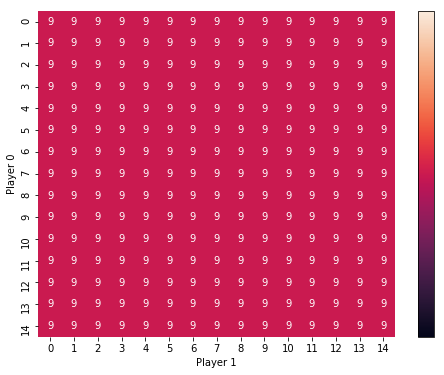

In [15]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(last_heat[-10, 0, :, :], cbar=False, annot=True)
plt.xlabel('Player 1')
plt.ylabel('Player 0')
cbar = ax.figure.colorbar(ax.collections[0])
cbar.set_ticks([0, 2, 4, 6, 8, 10, 12, 14])
fig = ax.get_figure()
# fig.savefig('hybrid_heat0.eps', format='eps', dpi=500, bbox_inches='tight', pad_inches=0.1)

# Deep rank figure in the paper

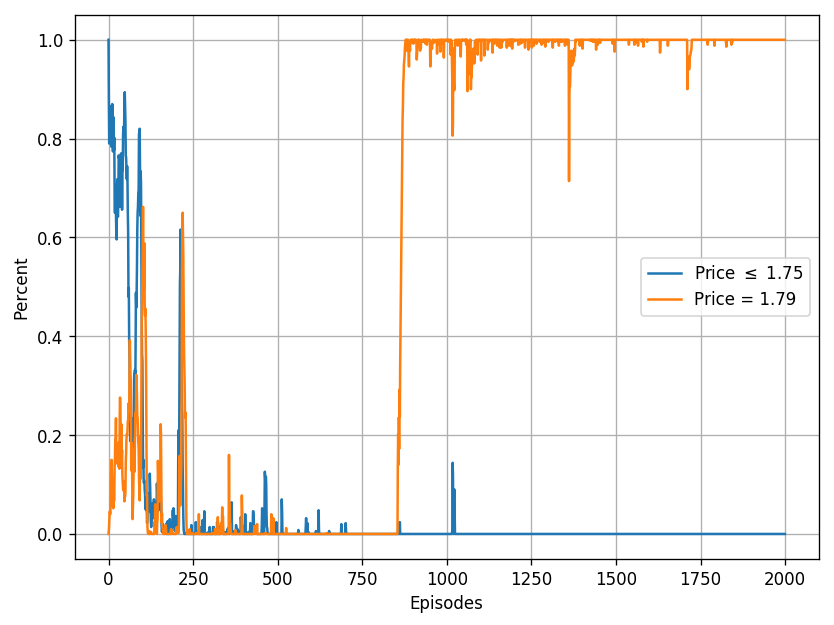

In [18]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=120)
ax.plot(bottom9_freq/num_sub/num_actions**2, color='tab:blue', label=r'Price $\leq$ 1.75')
ax.plot(full_freq0[:, 9]/num_sub/num_actions**2, color='tab:orange', label ='Price = 1.79')
# ax.plot(full_freq0[:, 13]/num_sub/num_actions**2, 'o', markersize =1, color='tab:red', label ='Price = 1.83')
# ax.plot(full_freq0[:, 10]/num_sub/num_actions**2, '-.', color='tab:red', label ='Price = 1.83')
ax.set_ylabel('Percent')
ax.set_xlabel('Episodes')
ax.legend(loc='best')
ax.grid(True)
# plt.savefig('Drank.eps', format='eps', dpi=500, bbox_inches='tight', pad_inches=0.1)
plt.show()

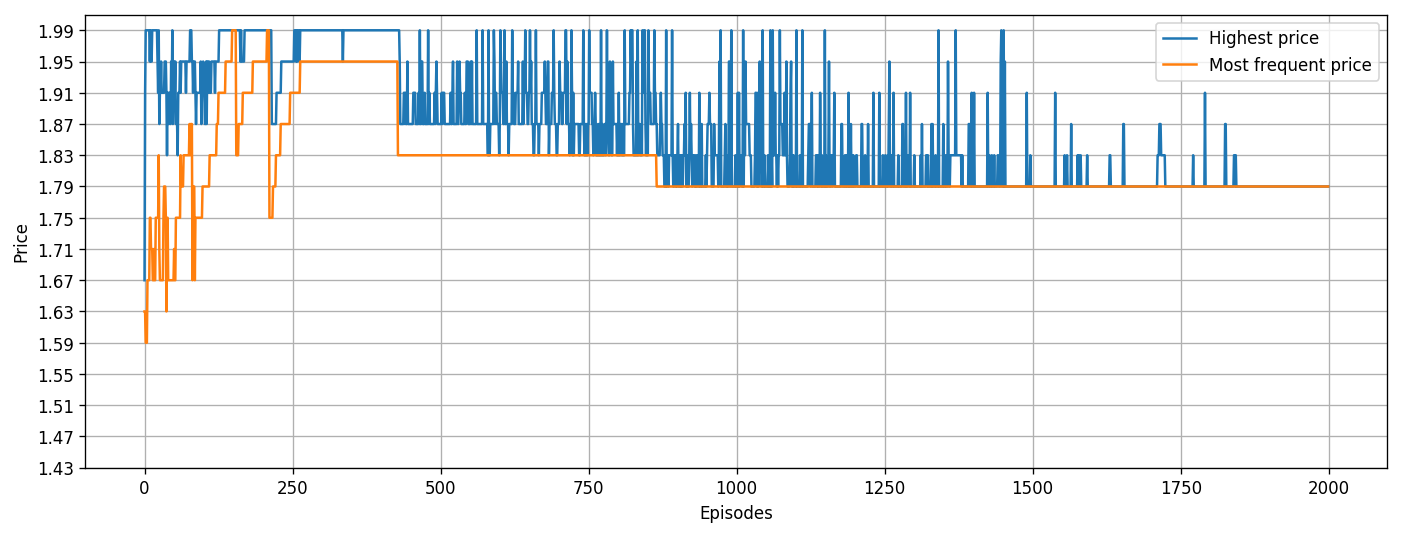

In [19]:
fig, ax = plt.subplots(figsize=(14, 5), dpi=120)
ax.plot(1.43 + 0.04*max_price, color='tab:blue', label='Highest price')
ax.plot(1.43 + 0.04*max_freq, color='tab:orange', label ='Most frequent price')
ax.set_ylabel('Price')
ax.yaxis.set_ticks(np.arange(1.43, 2.0, 0.04))
ax.set_xlabel('Episodes')
ax.legend(loc='best')
ax.grid(True)
# plt.savefig('max.eps', format='eps', dpi=1000, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [20]:
full_freq1 = np.zeros((num_episodes, num_actions))
for i in range(num_episodes):
    full_freq1[i, heat_uniq1[i].astype(int)] = heat_freq1[i]
max_price1 = np.zeros(num_episodes)
max_freq1 = np.zeros(num_episodes)
bottom9_freq1 = np.zeros(num_episodes)
bottom3_freq1 = np.zeros(num_episodes)
for i in range(num_episodes):
    max_price1[i] = np.max(heat_uniq1[i])
    max_freq1[i] = np.argmax(full_freq1[i, :])
    bottom9_freq1[i] = np.sum(full_freq1[i, :9])
    bottom3_freq1[i] = np.sum(full_freq1[i, :3])

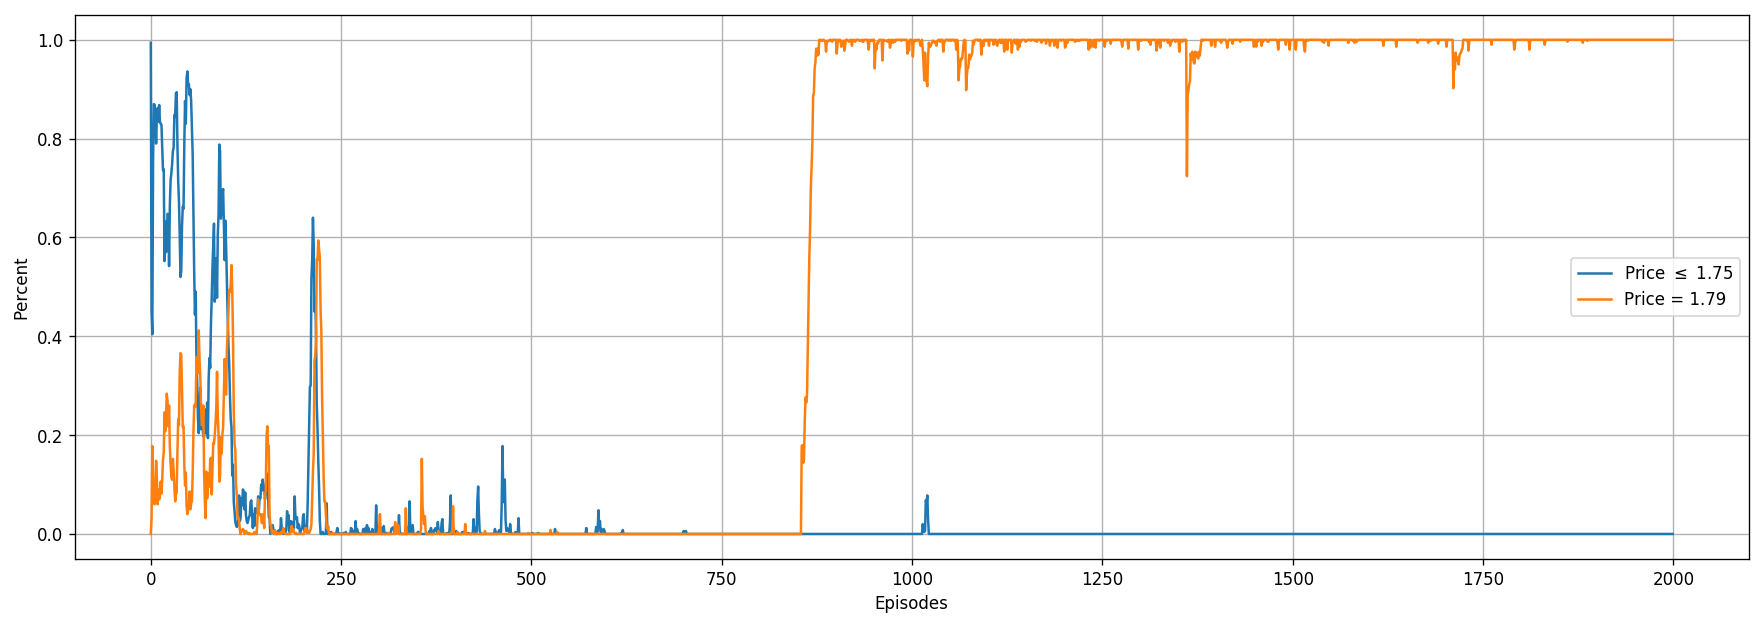

In [23]:
fig, ax = plt.subplots(figsize=(18, 6), dpi=120)
ax.plot(bottom9_freq1/num_sub/num_actions**2, color='tab:blue', label=r'Price $\leq$ 1.75')
ax.plot(full_freq1[:, 9]/num_sub/num_actions**2, color='tab:orange', label =r'Price = 1.79')
ax.set_ylabel('Percent')
ax.set_xlabel('Episodes')
ax.legend(loc='best')
ax.grid(True)
# plt.savefig('.eps', format='eps', dpi=500, bbox_inches='tight', pad_inches=0.1)
plt.show()

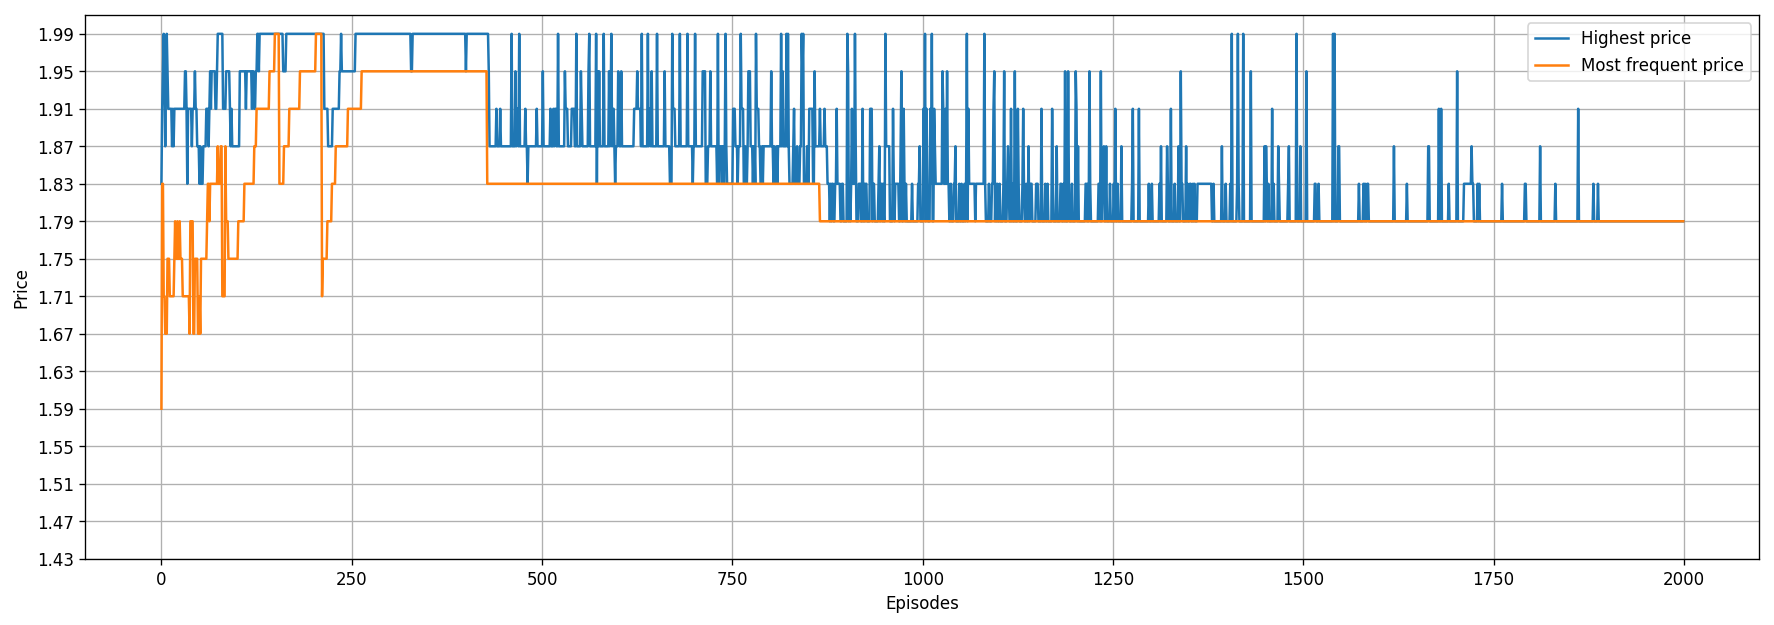

In [24]:
fig, ax = plt.subplots(figsize=(18, 6), dpi=120)
ax.plot(1.43 + 0.04*max_price1, color='tab:blue', label='Highest price')
ax.plot(1.43 + 0.04*max_freq1, color='tab:orange', label ='Most frequent price')
ax.set_ylabel('Price')
ax.yaxis.set_ticks(np.arange(1.43, 2.0, 0.04))
ax.set_xlabel('Episodes')
ax.legend(loc='best')
ax.grid(True)
# plt.savefig('.eps', format='eps', dpi=500, bbox_inches='tight', pad_inches=0.1)
plt.show()

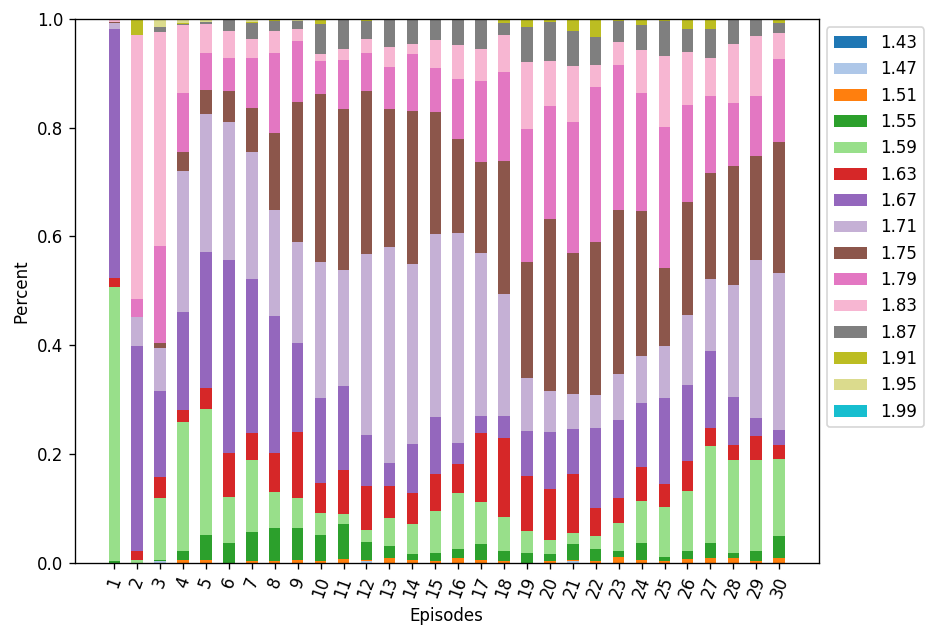

In [26]:
N = 0
ind = np.arange(N+1, N+31)
width = 0.5
# plt.style.use('default')
cm = plt.get_cmap('tab20')
plt.rcParams["axes.prop_cycle"] = plt.cycler('color', [cm(1.*i/num_actions) for i in range(num_actions)])
p = []
fig, ax = plt.subplots(figsize=(8,6), dpi=120)
for k in range(num_actions):
    p.append(plt.bar(ind, full_freq1[N:N+30, k]/112500, width, bottom = np.sum(full_freq1[N:N+30, :k], axis=1)/112500))

plt.legend((p[0][0], p[1][0], p[2][0], p[3][0], p[4][0], p[5][0], p[6][0], p[7][0], 
            p[8][0], p[9][0], p[10][0], p[11][0], p[12][0], p[13][0], p[14][0]), 
           ('1.43', '1.47', '1.51', '1.55', '1.59', '1.63', '1.67', '1.71',
            '1.75', '1.79', '1.83', '1.87', '1.91', '1.95', '1.99'), bbox_to_anchor=(1.0, 1.0))
plt.xticks(ind)
plt.xticks(rotation=70) 
ax.set_xlabel('Episodes')
ax.set_ylabel('Percent')
# plt.savefig('begin_bar.eps', format='eps', dpi=1000, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=120)
ax.hist(rand_corr0, bins=200)
# ax.plot(bottom3_freq/112500, color='tab:orange', label =r'Price $\leq$ 1.51')
ax.set_ylabel('Frequency')
ax.set_xlabel('Correlation')
# ax.legend(loc='best')
# ax.grid(True)
plt.savefig('rand_corr.eps', format='eps', dpi=1000, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=120)
ax.hist(recen_corr0, bins=200)
ax.set_ylabel('Frequency')
ax.set_xlabel('Correlation')
# ax.legend(loc='best')
# ax.grid(True)
plt.savefig('recen_corr.eps', format='eps', dpi=1000, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(14, 5), dpi=120)
ax.plot(recen_corr0, color='tab:blue')
# ax.plot(rand_corr0, 'o', markersize=2, color='tab:orange')
ax.set_ylabel('Correlation')
ax.set_xlabel('Iterations')
# ax.grid(True)
# plt.savefig('rand_corr_series.eps', format='eps', dpi=1000, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=120)
ax.plot(rand_corr0[:10000], 'o', markersize=1, color='tab:orange', label='Random')
ax.plot(recen_corr0[:10000], 'o', markersize=1, color='tab:blue', label='Recent')
ax.legend(loc='best')
ax.set_ylabel('Correlation')
ax.set_xlabel('Iterations')
# ax.grid(True)
plt.savefig('corr_series_begin.eps', format='eps', dpi=200, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [ ]:
len(recen_corr0)/2000

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=120)
x_ticks = np.arange(len(recen_corr0) - 10000, len(recen_corr0))
ax.plot(x_ticks, rand_corr0[-10000:], 'o', markersize=1, color='tab:orange', label='Random')
ax.plot(x_ticks, recen_corr0[-10000:], 'o', markersize=1, color='tab:blue', label='Recent')
# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(len(recen_corr0) - 10000, len(recen_corr0), 500)
# minor_ticks = np.arange(0, 101, 5)

ax.set_xticks(major_ticks)
# ax.set_xticks(minor_ticks, minor=True)

ax.legend(loc='best')
ax.set_ylabel('Correlation')
ax.set_xlabel('Iterations')
ax.grid(True)
plt.xticks(rotation=70) 
# plt.savefig('corr_series_end.eps', format='eps', dpi=1000, bbox_inches='tight', pad_inches=0.1)
plt.show()